https://www.kaggle.com/code/rohitgarud/all-almost-keyword-extraction-techniques-in-nlp



1.1 Парсинг данных
-

In [69]:
# импорт библиотек, необходимых для решения пункта 1.1 (парсинг данных)
from bs4 import BeautifulSoup
import pandas as pd  
import os
import numpy as np

In [70]:
folder_path = r'C:\Users\pcher\OneDrive\Рабочий стол\demo_solutions\data'

data_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.html'):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

        soup = BeautifulSoup(file_content, 'html.parser')

        rating = soup.find('span', {'class': 'tm-votes-lever__score-counter tm-votes-lever__score-counter tm-votes-lever__score-counter_rating'})
        company = soup.find('a', {'class': 'tm-company-card__name'})
        titles = soup.find_all('a', {'class': 'tm-title__link'})
        articles = soup.find_all('div', {'class': 'article-formatted-body'})
        rating_text = rating.get_text().strip()
        company_text = company.get_text().strip()
        titles_text = [link.get_text().strip() for link in titles]
        articles_text = [link.get_text().strip() for link in articles]

        rating_values = [rating_text] * len(articles_text)
        company_values = [company_text] * len(articles_text)

        elements_dict = {
            'rating': rating_values,
            'company': company_values,
            'titles': titles_text,
            'articles': articles_text,
        }

        data_list.append(elements_dict)

df = pd.DataFrame(data_list)
df = df.apply(lambda col: col.explode()).reset_index(drop=True)
df


,rating,company,titles,articles
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе..."
...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои..."
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...


In [71]:
import re
import nltk
import emoji
import unicodedata

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from pymorphy2 import MorphAnalyzer
import string

# import contractions
# import inflect

nltk.download('stopwords')
nltk.download('punkt', quiet=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
morph = MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

# Функция для токенизации, лемматизации и удаления стоп-слов
def preprocess_text(text):
    #удаление эмоджи
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Токенизация
    tokens = word_tokenize(text)
    
    numbers = [i for i in range(10)]
    numbers = list(map(str, numbers))
    
#     text = re.sub(r'[^\w\s]', '', text)
    text = [word.lower() for word in word_tokenize(text) if re.match(r'\w', word)]

    # Лемматизация
    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]
    
    # Удаление стоп-слов и пунктуации
    filtered_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]
    
    return ' '.join(filtered_tokens)

df['processed_articles'] = df['articles'].apply(preprocess_text)
df['processed_titles'] = df['titles'].apply(preprocess_text)

print(df[['articles', 'processed_articles']].head())
print(df[['titles', 'processed_titles']].head())

                                            articles  \
0  Криптовалюты пока не захватили мир, потому что...   
1  Привет, читатель! Хотел поделиться историей о ...   
2  Под Новый Год мы с женой пересматриваем одну п...   
3  Привет! Я Лёша. Cейчас руковожу командами эмоц...   
4  Меня зовут Константин, последние 6 лет я профе...   

                                  processed_articles  
0  криптовалюта пока захватить мир мозг начинать ...  
1  привет читатель хотеть поделиться история прий...  
2  новый год жена пересматривать популярный магич...  
3  привет лёша cейчас руководить команда эмоциона...  
4  звать константин последний 6 год профессиональ...  
                                              titles  \
0  Место крипты в реальном мире, или Куда придёт ...   
1             Как я в 22 года получил «лычку» Senior   
2  Практическая магия Istio при построении архите...   
3                     Зачем вам эмоциоанльный дизайн   
4  Что я делал, когда развивал свою карьеру бэкен... 

In [73]:
df

,rating,company,titles,articles,processed_articles,processed_titles
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",криптовалюта пока захватить мир мозг начинать ...,место крипта реальный мир прийти веб завтра
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",привет читатель хотеть поделиться история прий...,22 год получить « лычко » senior
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,новый год жена пересматривать популярный магич...,практический магия istio построение архитектур...
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,привет лёша cейчас руководить команда эмоциона...,эмоциоанльный дизайн
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",звать константин последний 6 год профессиональ...,делать развивать свой карьера бэкенд разработчик
...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",хабра привет саша product manager ozon хотеть ...,создание карта зависимость увидеть системный у...
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",привет звать дима руководитель группа разработ...,приглашать ozon tech community qa meetup
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",весь привет – влад руководитель группа поисков...,приглашать ozon tech community go meetup
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Современные устройства и браузеры развиваются ...,современный устройство браузер развиваться дос...,видеоредактор работа видео canvas


In [74]:
df_idf = df.copy()

In [75]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    stop_words = set(stopwords.words('russian'))
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

df_idf['processed_articles'] = df_idf['articles'].apply(preprocess_text)
df_idf['processed_titles'] = df_idf['titles'].apply(preprocess_text)

df_idf['combined_text'] = df_idf['processed_articles'].apply(lambda x: ' '.join(x)) + ' ' + df_idf['processed_titles'].apply(lambda x: ' '.join(x))

# Обучение Word2Vec
combined_text = df_idf['combined_text'].apply(preprocess_text)
word2vec_model = Word2Vec(sentences=combined_text, vector_size=100, window=5, min_count=1, workers=4)

# Функция для получения векторов слов в виде списка
def get_word_vectors(text, model):
    vectors = []
    for word in text:
        if word in model.wv:
            vectors.append(model.wv[word])
    return vectors

df_idf['vector_titles'] = df_idf['processed_titles'].apply(lambda x: get_word_vectors(x, word2vec_model))
df_idf['vector_articles'] = df_idf['processed_articles'].apply(lambda x: get_word_vectors(x, word2vec_model))

In [76]:
df_idf.vector_titles[0]

[array([-0.00953704,  0.00119196, -0.00998465,  0.00175204, -0.00588845,
         0.00895446,  0.00678651, -0.00186892,  0.0067038 ,  0.00682206,
        -0.00949393, -0.00822708, -0.00696554,  0.00375535, -0.00796112,
        -0.00500824,  0.0034443 , -0.01004965,  0.00386144, -0.00067084,
        -0.00171648, -0.00943857,  0.00565265, -0.00738296,  0.00956489,
         0.00678955, -0.00806524, -0.00326454,  0.00770877,  0.00574683,
        -0.00196678, -0.00195672,  0.00758314,  0.00791665,  0.0066475 ,
        -0.00655356,  0.0008965 ,  0.00459226, -0.00562472, -0.00894988,
         0.0076391 ,  0.0061366 , -0.00718516,  0.00345391,  0.00563099,
         0.0046449 ,  0.00239292, -0.00193648, -0.00012973,  0.00669836,
         0.00410677,  0.00936804,  0.00723295,  0.00617732,  0.00356339,
        -0.00093776, -0.00192527,  0.00477925, -0.01001563, -0.0055831 ,
        -0.00983137,  0.00452373, -0.00936481,  0.00186048,  0.00511004,
        -0.00315184,  0.006772  ,  0.00396362, -0.0

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Объединение всех векторов слов в один массив
all_vectors = df_idf['vector_titles'].sum() + df_idf['vector_articles'].sum()

# Преобразование списка в массив numpy
all_vectors_array = np.array(all_vectors)

# Создание экземпляра MinMaxScaler
min_max_scaler = MinMaxScaler()

# Применение Min-Max Scaling к векторам
min_max_scaled_vectors = min_max_scaler.fit_transform(all_vectors_array)

df_idf['vector_titles_minmax'] = df_idf['vector_titles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf['vector_articles_minmax'] = df_idf['vector_articles'].apply(lambda x: min_max_scaler.transform(np.array(x)))
df_idf

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...","[криптовалюты, пока, захватили, мир, мозг, нач...","[место, крипты, реальном, мире, придёт, веб, з...",криптовалюты пока захватили мир мозг начинает ...,"[[-0.009537036, 0.0011919572, -0.009984652, 0....","[[-0.0030913185, 0.0049497504, -0.00877814, -0...","[[0.050113916, 0.52984285, 0.0008367598, 0.576...","[[0.3607757, 0.7078547, 0.05970815, 0.14354163..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...","[привет, читатель, хотел, поделиться, историей...","[22, года, получил, лычку, senior]",привет читатель хотел поделиться историей приш...,"[[0.004360566, -0.0027586443, 0.008653853, 0.0...","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.71993136, 0.34269738, 0.91029704, 0.778801...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,"[новый, год, женой, пересматриваем, одну, попу...","[практическая, магия, istio, построении, архит...",новый год женой пересматриваем одну популярную...,"[[0.0051829843, 0.0028387804, -0.004763869, -0...","[[0.0053889905, -0.008768327, 0.007134872, -0....","[[0.75956917, 0.60785514, 0.2555833, 0.1501102...","[[0.769498, 0.05801043, 0.8361788, 0.43821898,..."
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,"[привет, лёша, cейчас, руковожу, командами, эм...","[эмоциоанльный, дизайн]",привет лёша cейчас руковожу командами эмоциона...,"[[0.008698716, 0.0014630341, 0.0096243415, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.9290155, 0.54268414, 0.95765173, 0.4086799...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...","[зовут, константин, последние, 6, лет, професс...","[делал, развивал, карьеру, бэкенд, разработчика]",зовут константин последние 6 лет профессиональ...,"[[-0.007805657, -0.004175652, -0.0074045467, 0...","[[-0.008792631, 0.0033845499, -0.007791142, -0...","[[0.13356051, 0.27557176, 0.1267322, 0.7259366...","[[0.08599171, 0.633709, 0.1078684, 0.3879943, ..."
...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...","[хабр, привет, саша, product, manager, ozon, х...","[создание, карты, зависимостей, увидеть, систе...",хабр привет саша product manager ozon хочу сег...,"[[-0.0012198347, -0.0070086215, 0.00680787, 0....","[[-0.008475609, 0.006132002, 0.0022919932, 0.0...","[[0.4509749, 0.14137009, 0.82022285, 0.8592096...","[[0.10127109, 0.7638596, 0.599872, 0.892354, 0..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...","[привет, зовут, дима, руководитель, группы, ра...","[приглашаем, ozon, tech, community, qa, meetup]",привет зовут дима руководитель группы разработ...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...","[всем, привет, влад, руководитель, группы, пои...","[приглашаем, ozon, tech, community, go, meetup]",всем привет влад руководитель группы поисковой...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[0.004472693, 0.011116877, -0.007158185, -0.0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.7253355, 1.0, 0.13875335, 0.47445124, 0.25..."
218,415.7

In [78]:
df_idf

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...","[криптовалюты, пока, захватили, мир, мозг, нач...","[место, крипты, реальном, мире, придёт, веб, з...",криптовалюты пока захватили мир мозг начинает ...,"[[-0.009537036, 0.0011919572, -0.009984652, 0....","[[-0.0030913185, 0.0049497504, -0.00877814, -0...","[[0.050113916, 0.52984285, 0.0008367598, 0.576...","[[0.3607757, 0.7078547, 0.05970815, 0.14354163..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...","[привет, читатель, хотел, поделиться, историей...","[22, года, получил, лычку, senior]",привет читатель хотел поделиться историей приш...,"[[0.004360566, -0.0027586443, 0.008653853, 0.0...","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.71993136, 0.34269738, 0.91029704, 0.778801...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,"[новый, год, женой, пересматриваем, одну, попу...","[практическая, магия, istio, построении, архит...",новый год женой пересматриваем одну популярную...,"[[0.0051829843, 0.0028387804, -0.004763869, -0...","[[0.0053889905, -0.008768327, 0.007134872, -0....","[[0.75956917, 0.60785514, 0.2555833, 0.1501102...","[[0.769498, 0.05801043, 0.8361788, 0.43821898,..."
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,"[привет, лёша, cейчас, руковожу, командами, эм...","[эмоциоанльный, дизайн]",привет лёша cейчас руковожу командами эмоциона...,"[[0.008698716, 0.0014630341, 0.0096243415, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.9290155, 0.54268414, 0.95765173, 0.4086799...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...","[зовут, константин, последние, 6, лет, професс...","[делал, развивал, карьеру, бэкенд, разработчика]",зовут константин последние 6 лет профессиональ...,"[[-0.007805657, -0.004175652, -0.0074045467, 0...","[[-0.008792631, 0.0033845499, -0.007791142, -0...","[[0.13356051, 0.27557176, 0.1267322, 0.7259366...","[[0.08599171, 0.633709, 0.1078684, 0.3879943, ..."
...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...","[хабр, привет, саша, product, manager, ozon, х...","[создание, карты, зависимостей, увидеть, систе...",хабр привет саша product manager ozon хочу сег...,"[[-0.0012198347, -0.0070086215, 0.00680787, 0....","[[-0.008475609, 0.006132002, 0.0022919932, 0.0...","[[0.4509749, 0.14137009, 0.82022285, 0.8592096...","[[0.10127109, 0.7638596, 0.599872, 0.892354, 0..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...","[привет, зовут, дима, руководитель, группы, ра...","[приглашаем, ozon, tech, community, qa, meetup]",привет зовут дима руководитель группы разработ...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...","[всем, привет, влад, руководитель, группы, пои...","[приглашаем, ozon, tech, community, go, meetup]",всем привет влад руководитель группы поисковой...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[0.004472693, 0.011116877, -0.007158185, -0.0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.7253355, 1.0, 0.13875335, 0.47445124, 0.25..."
218,415.7

Поиск биграмм
-

In [79]:
from nltk import FreqDist, bigrams
from sklearn.feature_extraction.text import CountVectorizer

# преобразование списков слов обратно в строки для CountVectorizer
df_idf['processed_articles'] = df_idf['processed_articles'].apply(lambda x: ' '.join(x))
df_idf['processed_titles'] = df_idf['processed_titles'].apply(lambda x: ' '.join(x))

df_idf['processed_titles']

0           место крипты реальном мире придёт веб завтра
1                           22 года получил лычку senior
2      практическая магия istio построении архитектур...
3                                   эмоциоанльный дизайн
4             делал развивал карьеру бэкенд разработчика
                             ...                        
215    создание карты зависимостей увидеть системный ...
216             приглашаем ozon tech community qa meetup
217             приглашаем ozon tech community go meetup
218                    видеоредактор работа видео canvas
219                   ускоряем поиск коду android studio
Name: processed_titles, Length: 220, dtype: object

In [80]:
# извлечение биграмм из столбцов 'processed_articles' и 'processed_titles'
vectorizer_articles = CountVectorizer(ngram_range=(2, 2))
vectorizer_titles = CountVectorizer(ngram_range=(2, 2))

In [81]:
# преобразование векторов биграмм в DataFrame
bi_articles = pd.DataFrame(vectorizer_articles.fit_transform(df_idf['processed_articles']).toarray(),
                           columns=vectorizer_articles.get_feature_names_out())

bi_titles = pd.DataFrame(vectorizer_titles.fit_transform(df_idf['processed_titles']).toarray(),
                         columns=vectorizer_titles.get_feature_names_out())

In [82]:
# расчет частоты биграмм
freq_bi_articles = bi_articles.sum().sort_values(ascending=False)
freq_bi_titles = bi_titles.sum().sort_values(ascending=False)


In [83]:
# Вывод наиболее часто встречающихся биграмм
print("Top 10 биграмм в статьях:")
print(freq_bi_articles.head(10))

print("\nTop 10 биграмм в заголовках:")
print(freq_bi_titles.head(10))

Top 10 биграмм в статьях:
привет зовут         25
привет хабр          18
статье расскажу      15
всем привет          14
yandex cloud         12
подробности катом    12
всё это              10
хочу поделиться       9
статье хочу           8
2023 года             8
dtype: int64

Top 10 биграмм в заголовках:
ozon tech                4
tech community           4
приглашаем ozon          3
легко построить          2
diplodoc открытый        2
почему инфраструктура    2
обычно состоит           2
ui легко                 2
apache spark             2
datalens опенсорсе       2
dtype: int64


Ключевые слова
-

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_combined = TfidfVectorizer()
tfidf_matrix_combined = vectorizer_combined.fit_transform(df_idf['combined_text'])

# получение списка ключевых слов
feature_names_combined = vectorizer_combined.get_feature_names_out()
max_tfidf_combined = tfidf_matrix_combined.max(axis=0).toarray()[0]
print(max_tfidf_combined)


[0.12052757 0.13013326 0.10628188 ... 0.1135209  0.06171422 0.11909797]


In [85]:
# сортировка ключевых слов
sorted_indices_combined = max_tfidf_combined.argsort()[::-1]
top_keywords_combined = [feature_names_combined[i] for i in sorted_indices_combined[:15]] # Top 15 ключевых слов
print(top_keywords_combined)

['junit', 'kubernetes', 'senior', 'selenoid', 'userver', 'трекер', 'битрикс24', 'движения', 'webassembly', 'субтитры', 'crm', 'ydb', 'автотестов', 'mysql', 'datalens']


In [86]:
# Получаем ключевые слова и их частоту
keywords = top_keywords_combined
freqs = max_tfidf_combined[sorted_indices_combined][:15]

Разведочный анализ, визуализация
-

In [87]:
df_idf['rating'] = df_idf['rating'].astype('float64') 

In [88]:
df_idf

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",криптовалюты пока захватили мир мозг начинает ...,место крипты реальном мире придёт веб завтра,криптовалюты пока захватили мир мозг начинает ...,"[[-0.009537036, 0.0011919572, -0.009984652, 0....","[[-0.0030913185, 0.0049497504, -0.00877814, -0...","[[0.050113916, 0.52984285, 0.0008367598, 0.576...","[[0.3607757, 0.7078547, 0.05970815, 0.14354163..."
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",привет читатель хотел поделиться историей приш...,22 года получил лычку senior,привет читатель хотел поделиться историей приш...,"[[0.004360566, -0.0027586443, 0.008653853, 0.0...","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.71993136, 0.34269738, 0.91029704, 0.778801...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,новый год женой пересматриваем одну популярную...,практическая магия istio построении архитектур...,новый год женой пересматриваем одну популярную...,"[[0.0051829843, 0.0028387804, -0.004763869, -0...","[[0.0053889905, -0.008768327, 0.007134872, -0....","[[0.75956917, 0.60785514, 0.2555833, 0.1501102...","[[0.769498, 0.05801043, 0.8361788, 0.43821898,..."
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,привет лёша cейчас руковожу командами эмоциона...,эмоциоанльный дизайн,привет лёша cейчас руковожу командами эмоциона...,"[[0.008698716, 0.0014630341, 0.0096243415, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.9290155, 0.54268414, 0.95765173, 0.4086799...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",зовут константин последние 6 лет профессиональ...,делал развивал карьеру бэкенд разработчика,зовут константин последние 6 лет профессиональ...,"[[-0.007805657, -0.004175652, -0.0074045467, 0...","[[-0.008792631, 0.0033845499, -0.007791142, -0...","[[0.13356051, 0.27557176, 0.1267322, 0.7259366...","[[0.08599171, 0.633709, 0.1078684, 0.3879943, ..."
...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",хабр привет саша product manager ozon хочу сег...,создание карты зависимостей увидеть системный ...,хабр привет саша product manager ozon хочу сег...,"[[-0.0012198347, -0.0070086215, 0.00680787, 0....","[[-0.008475609, 0.006132002, 0.0022919932, 0.0...","[[0.4509749, 0.14137009, 0.82022285, 0.8592096...","[[0.10127109, 0.7638596, 0.599872, 0.892354, 0..."
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",привет зовут дима руководитель группы разработ...,приглашаем ozon tech community qa meetup,привет зовут дима руководитель группы разработ...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7..."
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",всем привет влад руководитель группы поисковой...,приглашаем ozon tech community go meetup,всем привет влад руководитель группы поисковой...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[0.004472693, 0.011116877, -0.007158185, -0.0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.7253355, 1.0, 0.13875335, 0.47445124, 0.25..."
218,415.77,Ozon Tech,"Видеоредактор, работа с видео и зачем там Canvas",Сов

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

C:\Users\pcher\AppData\Local\Temp\ipykernel_16536\3906148953.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='company', y='rating', data=df_idf, ci=None)


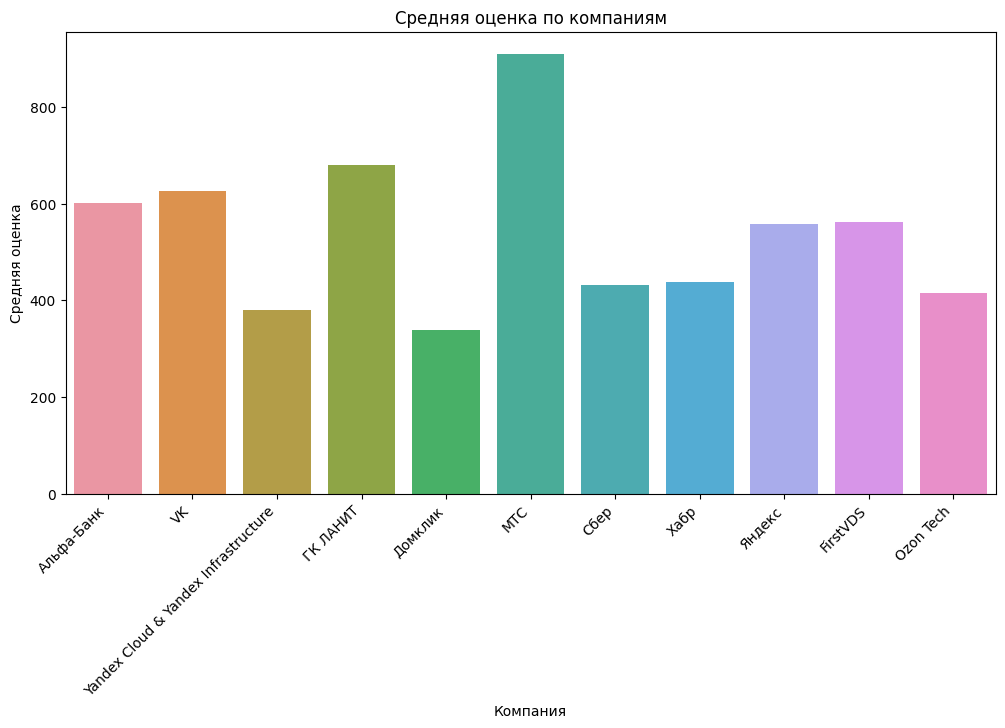

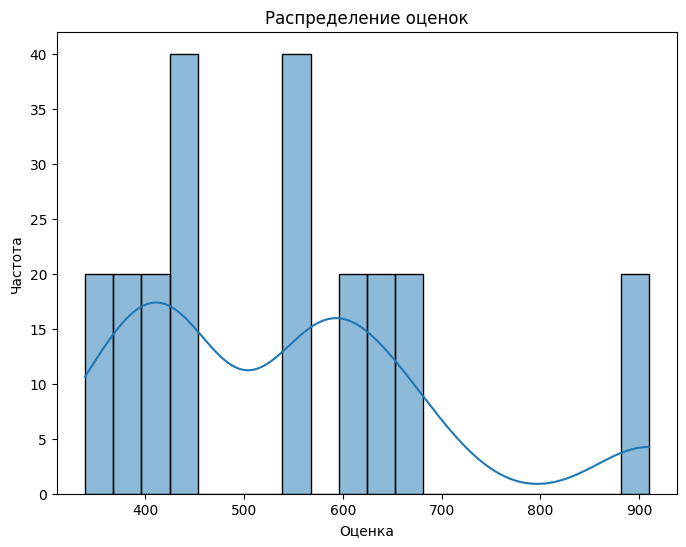

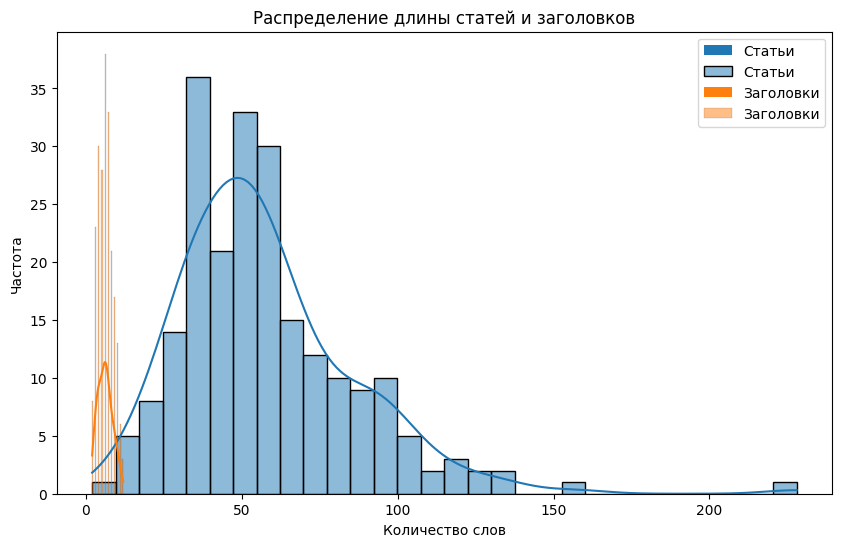

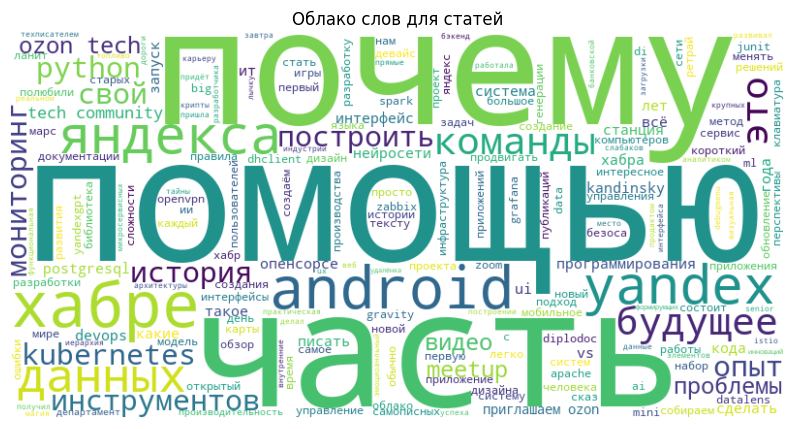

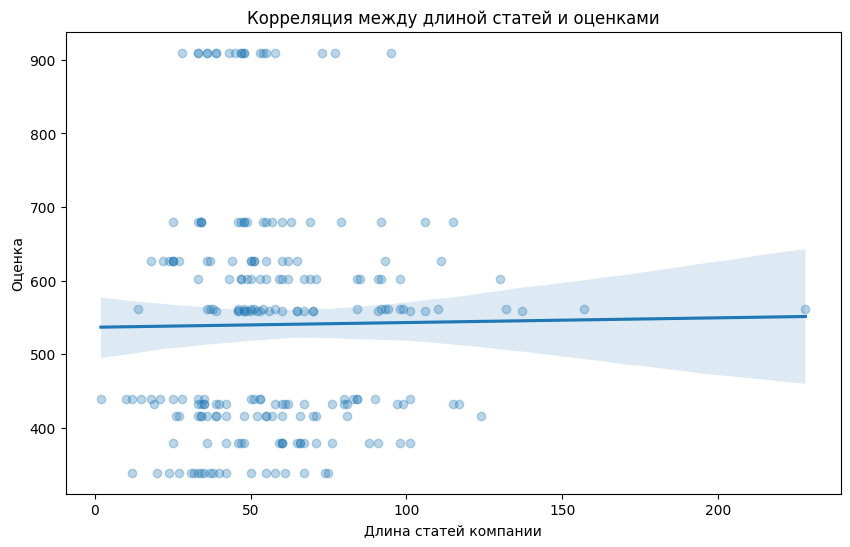

In [90]:
plt.rcParams['figure.figsize'] = (10, 6)

#   длины статей и заголовков
df_idf['article_length'] = df_idf['processed_articles'].apply(lambda x: len(x.split()))
df_idf['title_length'] = df_idf['processed_titles'].apply(lambda x: len(x.split()))

# Средняя оценка по компаниям
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='rating', data=df_idf, ci=None)
plt.title('Средняя оценка по компаниям')
plt.xlabel('Компания')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45, ha='right')
plt.show()

# Распределение оценок
plt.figure(figsize=(8, 6))
sns.histplot(df_idf['rating'], bins=20, kde=True)
plt.title('Распределение оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

# Распределение длины статей и заголовков
plt.figure()
sns.histplot(df_idf['article_length'], bins=30, kde=True, label='Статьи')
sns.histplot(df_idf['title_length'], bins=30, kde=True, label='Заголовки')
plt.title('Распределение длины статей и заголовков')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.legend()
plt.show()


# Облако слов для столбца со статьями. Датасет имеет смысл дополнительно очищать от стоп слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_idf['processed_titles'].explode()))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для статей')
plt.show()

# Корреляция между длиной статей и оценками
plt.figure(figsize=(10, 6))
sns.regplot(x='article_length', y='rating', data=df_idf, scatter_kws={'alpha':0.3})
plt.title('Корреляция между длиной статей и оценками')
plt.xlabel('Длина статей компании')
plt.ylabel('Оценка')
plt.show()


1) для облака слов обработать данные, чтобы мусора не было
2) по ключевым словам в заголовках сгруппировать данные по темам, создав новый столбец 
3) по возможности допарсить дату, сделать графики по датам

Logistic Regression (Логистическая регрессия) - классический метод машинного обучения, хорошо работает на небольших наборах текстовых данных.
Naive Bayes (Наивный Байес) - быстрый и эффективный для классификации текста алгоритм, основанный на теореме Байеса.
SVM (Метод опорных векторов) - мощный алгоритм машинного обучения, хорошо масштабируется на большие наборы текстовых данных.
Random Forest (Случайный лес) - ансамблевая модель, объединяющая множество решающих деревьев для высокой точности классификации.
Neural Networks (Нейронные сети) - глубокие нейронные сети, такие как RNN, CNN, LSTM дают самые передовые результаты в классификации текста.
BERT, RoBERTa, XLNet - трансформерные языковые модели для контекстуализации слов, достигают выдающихся результатов.

модели в skikit
Построить модель, оценить метриками
классификация:
- Точность (Accuracy) - доля правильно классифицированных примеров из всех. Показывает общую долю верных предсказаний.
- Полнота (Recall) - доля верно предсказанных положительных примеров от всех реальных положительных примеров. Показатель того, как часто модель находит положительный класс.
- precision (точность)
- F-мера (F1-score) - среднее гармоническое между полнотой и точностью. Общая метрика качества для несбалансированных классов.
- AUC-ROC - интегральная метрика качества классификатора на основе характеристики его чувствительности и специфичности. Чем ближе к 1, тем лучше.
- Полная ошибка (LogLoss) - показывает, насколько уверенно модель делает предсказания. Меньше - лучше.
- Матрица ошибок - наглядно демонстрирует типы ошибок модели по классам.

регрессия:
- Средняя абсолютная ошибка (MAE) - среднее абсолютное отклонение предсказанных значений от реальных. Чем меньше значение, тем выше точность.
- Среднеквадратичная ошибка (RMSE) - среднее квадратичное отклонение предсказанных значений от фактических. Меньше - лучше. Более чувствительна к выбросам, чем MAE.
- R-квадрат - доля дисперсии целевой переменной, объясненная моделью. 1 - идеальная модель, 0 - модель не лучше простого угадывания среднего.
- MAPE (средний абсолютный процент ошибки) - среднее абсолютное процентное отклонение. Удобнее для интерпретации ошибки.
- Медиана абсолютного отклонения - менее чувствительная к выбросам метрика ошибки регрессии.
- Диаграммы рассеивания - визуализация соответствия предсказанных и реальных значений.


Для целевой метки поставить 1 напротив компании с самаъым высоким рейтингом

Создаём облако слов из ключевых слов
-

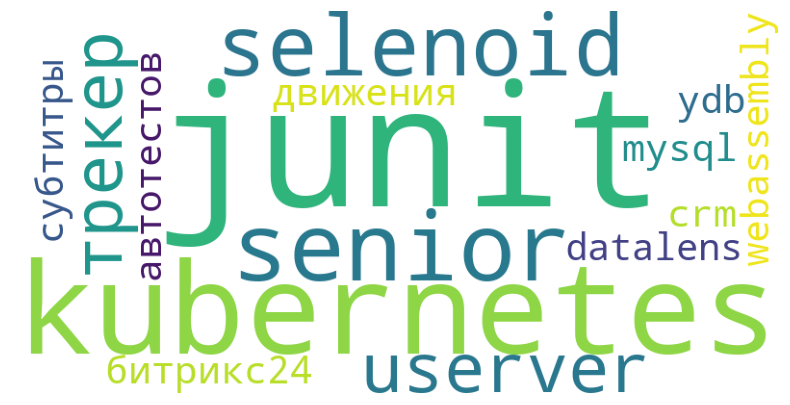

In [91]:
#датафрейм с ключевыми словами
df_key = pd.DataFrame({'keyword': keywords, 'frequency': freqs}) # подсчет ключевых слов и их частоты есть выше

# Строим облако слов
text = " ".join(keywords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

Добавляем целевую метку
-

Добавим в датасет столбец с целевой меткой (1 у статей с максимальным рейтингом компании, у остальных - 0)

In [215]:
df_target = df_idf.copy()

# Находим два уникальных максимальных значения в столбце 'rating'
max1 = df_target['rating'].max()  
df_t = df_target[df.rating != max1]
max2 = df_t['rating'].max()

In [216]:
print(max1, max2)

909.77 680.23


In [217]:
# Устанавливаем 1 в столбец 'target' для строк, где 'rating' соответствует этим двум максимальным значениям
df_target['target'] = 0
df_target.loc[df_target['rating'] == max1, 'target'] = 1  
df_target.loc[df_target['rating'] == max2, 'target'] = 1

In [218]:
df_target

,rating,company,titles,articles,processed_articles,processed_titles,combined_text,vector_titles,vector_articles,vector_titles_minmax,vector_articles_minmax,article_length,title_length,target
0,601.87,Альфа-Банк,"Место крипты в реальном мире, или Куда придёт ...","Криптовалюты пока не захватили мир, потому что...",криптовалюты пока захватили мир мозг начинает ...,место крипты реальном мире придёт веб завтра,криптовалюты пока захватили мир мозг начинает ...,"[[-0.009537036, 0.0011919572, -0.009984652, 0....","[[-0.0030913185, 0.0049497504, -0.00877814, -0...","[[0.050113916, 0.52984285, 0.0008367598, 0.576...","[[0.3607757, 0.7078547, 0.05970815, 0.14354163...",91,7,0
1,601.87,Альфа-Банк,Как я в 22 года получил «лычку» Senior,"Привет, читатель! Хотел поделиться историей о ...",привет читатель хотел поделиться историей приш...,22 года получил лычку senior,привет читатель хотел поделиться историей приш...,"[[0.004360566, -0.0027586443, 0.008653853, 0.0...","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.71993136, 0.34269738, 0.91029704, 0.778801...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7...",47,5,0
2,601.87,Альфа-Банк,Практическая магия Istio при построении архите...,Под Новый Год мы с женой пересматриваем одну п...,новый год женой пересматриваем одну популярную...,практическая магия istio построении архитектур...,новый год женой пересматриваем одну популярную...,"[[0.0051829843, 0.0028387804, -0.004763869, -0...","[[0.0053889905, -0.008768327, 0.007134872, -0....","[[0.75956917, 0.60785514, 0.2555833, 0.1501102...","[[0.769498, 0.05801043, 0.8361788, 0.43821898,...",98,11,0
3,601.87,Альфа-Банк,Зачем вам эмоциоанльный дизайн,Привет! Я Лёша. Cейчас руковожу командами эмоц...,привет лёша cейчас руковожу командами эмоциона...,эмоциоанльный дизайн,привет лёша cейчас руковожу командами эмоциона...,"[[0.008698716, 0.0014630341, 0.0096243415, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.9290155, 0.54268414, 0.95765173, 0.4086799...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7...",67,2,0
4,601.87,Альфа-Банк,"Что я делал, когда развивал свою карьеру бэкен...","Меня зовут Константин, последние 6 лет я профе...",зовут константин последние 6 лет профессиональ...,делал развивал карьеру бэкенд разработчика,зовут константин последние 6 лет профессиональ...,"[[-0.007805657, -0.004175652, -0.0074045467, 0...","[[-0.008792631, 0.0033845499, -0.007791142, -0...","[[0.13356051, 0.27557176, 0.1267322, 0.7259366...","[[0.08599171, 0.633709, 0.1078684, 0.3879943, ...",92,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,415.77,Ozon Tech,Создание карты зависимостей: как увидеть систе...,"Хабр, привет! Я Саша, Product Manager в Ozon. ...",хабр привет саша product manager ozon хочу сег...,создание карты зависимостей увидеть системный ...,хабр привет саша product manager ozon хочу сег...,"[[-0.0012198347, -0.0070086215, 0.00680787, 0....","[[-0.008475609, 0.006132002, 0.0022919932, 0.0...","[[0.4509749, 0.14137009, 0.82022285, 0.8592096...","[[0.10127109, 0.7638596, 0.599872, 0.892354, 0...",124,7,0
216,415.77,Ozon Tech,Приглашаем на Ozon Tech Community QA Meetup,"Привет, меня зовут Дима, я руководитель группы...",привет зовут дима руководитель группы разработ...,приглашаем ozon tech community qa meetup,привет зовут дима руководитель группы разработ...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[-0.010576816, 0.010677969, -6.883284e-05, -0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.0, 0.97920835, 0.48467615, 0.36243746, 0.7...",60,6,0
217,415.77,Ozon Tech,Приглашаем на Ozon Tech Community Go Meetup,"Всем привет! Я – Влад, руководитель группы пои...",всем привет влад руководитель группы поисковой...,приглашаем ozon tech community go meetup,всем привет влад руководитель группы поисковой...,"[[-0.0025722038, 0.009326283, 0.004779395, -0....","[[0.004472693, 0.011116877, -0.007158185, -0.0...","[[0.3857953, 0.9151771, 0.721244, 0.28246877, ...","[[0.7253355, 1.0, 0.13875335

In [219]:
df_target['target'].sum() # в 20 столбцах единица

40

In [220]:
df_target.to_csv('df_target.csv')

Делим на обущающую и тестовую выборки
-

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss


data = pd.read_csv('df_target.csv')

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data[['vector_titles', 'vector_articles', 'vector_titles_minmax', 'vector_articles_minmax']],
                                                    data['target'], test_size=0.2, random_state=42)


In [222]:
# pipeline с векторизацией и моделью Naive Bayes
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

In [223]:
# определение сетки параметров для GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

In [224]:
# обучение модели с автоматическим подбором гиперпараметров
grid_search.fit(X_train['vector_titles'].astype(str), y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.1, 0.5, 1.0],
                         'vectorizer__max_features': [500, 1000, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]})

In [225]:
# лучшие параметры
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')


Лучшие параметры: {'classifier__alpha': 0.1, 'vectorizer__max_features': 500, 'vectorizer__ngram_range': (1, 1)}


In [226]:
# Предсказание на тестовом наборе с лучшей моделью
y_pred = grid_search.predict(X_test['vector_titles'].astype(str))

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [227]:
# Вывод отчета по классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        34
           1       0.00      0.00      0.00        10

    accuracy                           0.77        44
   macro avg       0.39      0.50      0.44        44
weighted avg       0.60      0.77      0.67        44



c:\Users\pcher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pcher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pcher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [228]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[34  0]
 [10  0]]


In [229]:
# Дополнительные метрики
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')
print(f'Log Loss: {logloss:.2f}')

Precision: 0.00
Recall: 0.00
F1-Score: 0.00
AUC-ROC: 0.50
Log Loss: 7.85


c:\Users\pcher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
# Вывод распределения классов
print(f'Распределение классов в тестовом наборе:\n{y_test.value_counts()}')

# Вывод матрицы ошибок
print(f'Матрица ошибок:\n{conf_matrix}')

Распределение классов в тестовом наборе:
0    34
1    10
Name: target, dtype: int64
Матрица ошибок:
[[34  0]
 [10  0]]
